# Credit Card Fraud Detection Dataset 2023 Analysis


This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.


Data Source: The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines.

https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

Key Features:
* id: Unique identifier for each transaction
* V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
* Amount: The transaction amount
* Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

0. Importing the libraries

In [2]:
# Data Wrangling
import pandas as pd
import numpy as np

#Statistics / Logistic Regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Model turning
from sklearn.model_selection import GridSearchCV


# Load Dataset & Get Overview of the Data


In [3]:
credicard_df = pd.read_csv(r'C:\!Projects\cc_fraud_detect\data\creditcard_2023.csv')
data = credicard_df.copy()
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
data.shape

(568630, 31)

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
# checking the missings
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# checking for duplicated rows
data.duplicated().sum()

0

In [8]:
# no missings and duplicated rows

# Significant Variables

    Based on the logistic regression, the Z-scores for the coefficients of the variables V1 through V28 (excluding V5) are greater than 2, which indicates that these variables have a relatively strong and statistically significant impact on predicting the Class.

    However, since there are a large amount of independent variables (without strong theoretical justification), this can lead to overfitting.

In [9]:
#perform logistic regression using glm (generalized linear model) method
logit_equation = 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'
fit1 = smf.glm(logit_equation, data=data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               568630
Model:                            GLM   Df Residuals:                   568600
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53585.
Date:                Sun, 12 May 2024   Deviance:                   1.0717e+05
Time:                        22:50:54   Pearson chi2:                 7.82e+16
No. Iterations:                    13   Pseudo R-squ. (CS):             0.6981
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0810      0.084    108.499      0.0

In [10]:
# to avoid overfitting i will keep only V1-V5, Amount and class features

columns_to_keep = ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']

# creatind a new df

data = data[columns_to_keep]
data.head()

,id,V1,V2,V3,V4,V5,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,14278.97,0


# Distributin of columns in data

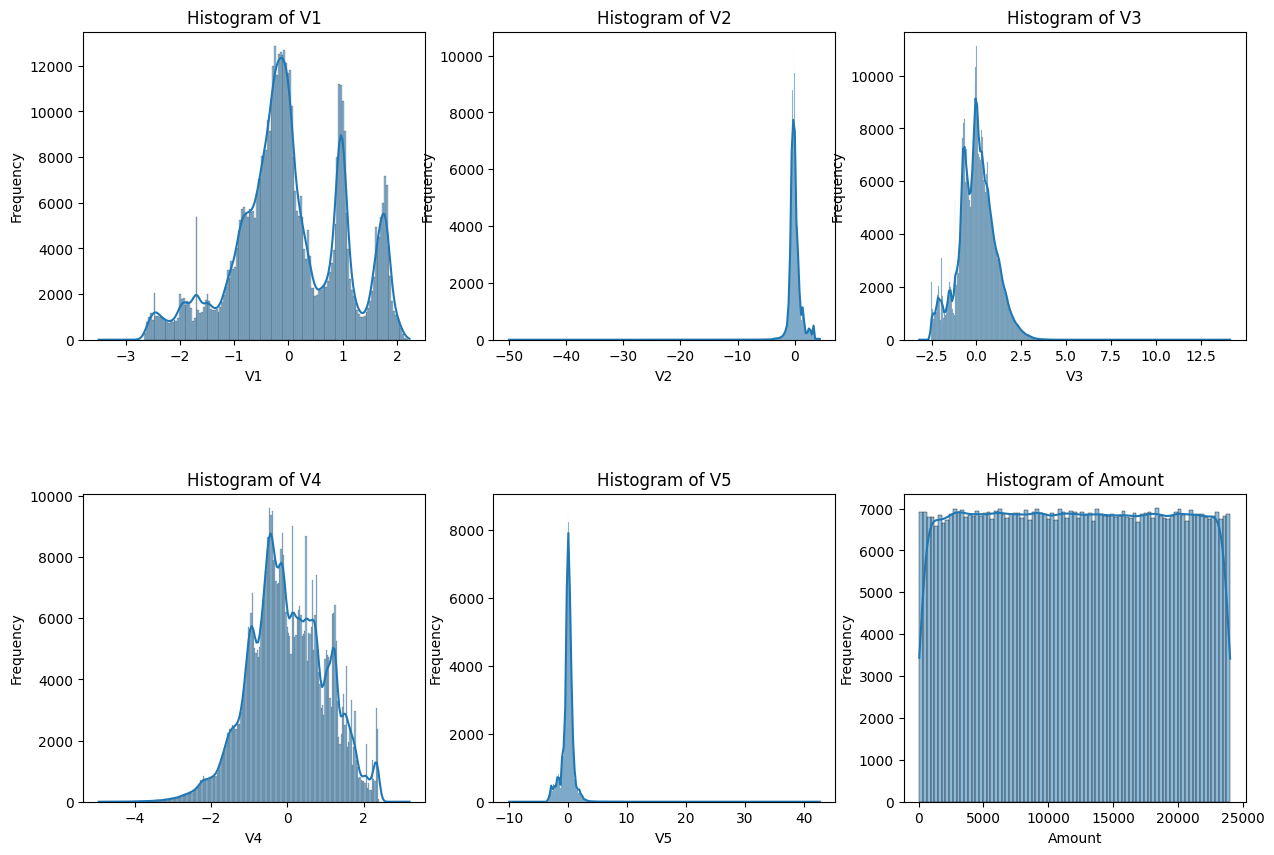

In [15]:
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# creating subplots for the histograms
fig, axes = plt.subplots(2,3, figsize = (15,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=data, x=col, kde=True, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(columns_to_plot), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

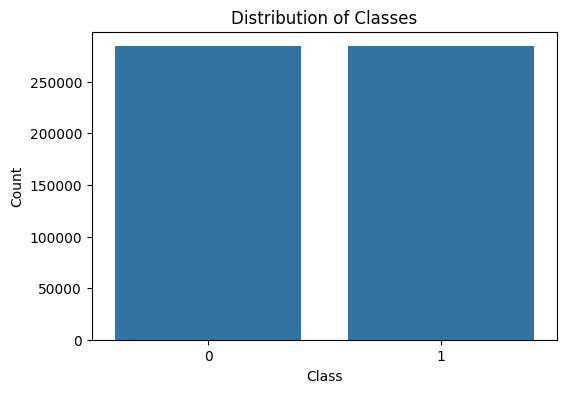

Count of Fraudulent Transactions: 284315
Count of Non-Fraudulent Transactions: 284315


In [16]:
# Distribution of Fraudulent Transactions in Dataset

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


fraud_count = (data['Class'] == 1).sum()
nonfraud_count = (data['Class'] == 0).sum()
print(f"Count of Fraudulent Transactions: {fraud_count}")
print(f"Count of Non-Fraudulent Transactions: {nonfraud_count}")

In [17]:
logit_equation2 = 'Class~V1+V2+V3+V4+V5'
fit2 = smf.glm(logit_equation2, data = data, family = sm.families.Binomial()).fit()
print(fit2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               568630
Model:                            GLM   Df Residuals:                   568624
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0149e+05
Date:                Sun, 12 May 2024   Deviance:                   2.0298e+05
Time:                        23:35:23   Pearson chi2:                 3.39e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6428
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3717      0.009    158.461      0.0

# Cross Validation of our Model